In [28]:
#Creating Raster Plot

In [19]:
import numpy as np
import matplotlib.pyplot as plt
import csv
import sys
from matplotlib import cm

In [ ]:
# return 2 dimensional arrays - first one (light) and second one (movement count)
# note that both return 2 dimensional array (9 x 1440)
# result_light: [[0,0,0,...],[0,0,0,...],...,[0,0,0...]]
# result_movement: [[12,1,0,32,...],...,[0,0,3,1,...]]

In [20]:
def read_csvfile(filename, nth):
    result_light = []
    result_movement = []
    prev_date = ""
    with open(filename) as f:
        current_light_row = []
        current_movement_row = []
        index = 0
        for line in f:
            if index == 0:
                col_index_max = len(line.split(","))
            else:
                cols = line.split(",")
                if prev_date == "" or prev_date == cols[0][0:10]:
                    current_light_row.append(int(cols[1]))
                    current_movement_row.append(int(cols[nth + 1]))
                else:
                    result_light.append(current_light_row)
                    result_movement.append(current_movement_row)
                    current_light_row = [int(cols[1])]
                    current_movement_row = [int(cols[nth + 1])]
                prev_date = cols[0][0:10]
            index += 1
        result_light.append(current_light_row)
        result_movement.append(current_movement_row)
    return (result_light, result_movement)

max movement: 23


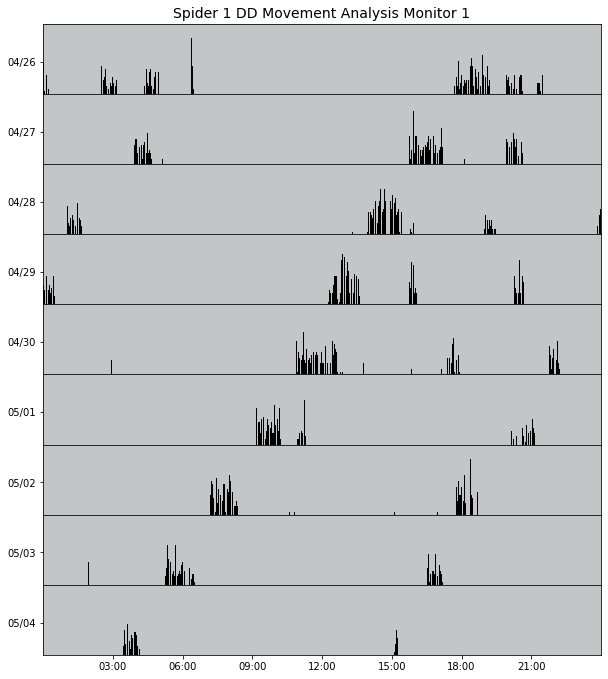

In [27]:
# For each day, generate bar chart for spider X (nth)

def draw_barchart(array_light, array_movement, nth):
    date_label = ["04/26","04/27","04/28","04/29","04/30","05/01","05/02","05/03","05/04"]
    number_of_days = len(array_movement)
    fig, axes = plt.subplots(nrows=number_of_days)
    fig.set_size_inches((10, 12))
    
    # find the maximum movement in all 9 days

    max_movement = 0
    for temp in array_movement:
        t = max(temp)
        if t > max_movement:
            max_movement = t
    print("max movement:",max_movement)

    # 1440: number of minutes in a day
    
    x = list(range(0,1440))
    axes[0].set_title('Spider ' + str(nth) + ' DD Movement Analysis Monitor 1', fontsize=14)
    
    #setting up axes

    for day_index, day_movement in enumerate(array_movement):
        axes[day_index].set_facecolor('#C2c6c7')
        axes[day_index].set_ylim(0, max_movement + 2)
        axes[day_index].set_xlim(-0.5, len(day_movement) - 0.5)
        
        # apply light on background color setting
        #axes[day_index].axvspan(xmin=600, xmax=650, facecolor="white")
        
        if 1 in array_light[day_index]:
            start_index = -1
            end_index = -1
            for minute_index, light in enumerate(array_light[day_index]):
                if light == 1 and start_index == end_index:
                    start_index = minute_index
                elif light == 0 and start_index != end_index:
                    end_index = minute_index
                    print("There is a light section ", start_index, end_index)
                    axes[day_index].axvspan(xmin = start_index, xmax = end_index, facecolor="white")
                    start_index = end_index
            if start_index != end_index:
                axes[day_index].axvspan(xmin = start_index, xmax = end_index, facecolor="white")

        # draw barchart
        
        axes[day_index].bar(x, day_movement, color="black")
        axes[day_index].get_xaxis().set_visible(False) # Hide all X ticks for now
        axes[day_index].set_yticks([max_movement / 2], labels=[date_label[day_index]])
    axes[number_of_days-1].get_xaxis().set_visible(True)
    axes[number_of_days-1].set_xticks([180,360,540,720,900,1080,1260],labels=["03:00","06:00","09:00","12:00","15:00","18:00","21:00"]);
    plt.subplots_adjust(bottom=0.15, hspace=0)
    plt.show()

csvfilename = 'Metazygia wittfeldae Monitor 1 Updated_DD.csv'
nthSpider = 1

(array_light,array_movement) = read_csvfile(csvfilename, nthSpider)
draw_barchart(array_light, array_movement, nthSpider)